In [13]:
import sys
sys.path.insert(0, '/home/griessbaum/Dropbox/UCSB/STARE_Project/STAREMaster_py/') 
import staremaster
import starepandas
import pystare
import numpy
import glob
import geopandas
import netCDF4
import matplotlib.pyplot as plt

# Plotting some

In [2]:
path = '/home/griessbaum/MOD09/MOD05_L2.A2005349.2125.061.2017294065400.hdf'
sdf = starepandas.read_granule(path, sidecar=True)
sdf.set_trixels(inplace=True)
sdf.head()

,lat,lon,stare,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared,trixels
0,37.523113,-171.022781,3461703427396677225,4.088355e+08,6652,15134,6528,9284,-9999,"POLYGON ((-171.2413683751765 37.4767503314676,..."
1,37.512848,-170.757797,3461638512807389609,4.088355e+08,6641,15158,6466,9300,-9999,"POLYGON ((-170.62610495806 37.56324274527477, ..."
2,37.502403,-170.502655,3461626395679801289,4.088355e+08,6631,15181,6405,9316,-9999,"POLYGON ((-170.62610495806 37.56324274527477, ..."
3,37.491814,-170.256668,3461630791091330921,4.088355e+08,6621,15203,6345,9331,-9999,POLYGON ((-170.4447238835748 37.46077035941144...
4,37.481102,-170.019226,3462097893175897033,4.088355e+08,6611,15225,6286,9346,-9999,POLYGON ((-169.9562740351446 37.39907469363392...


<AxesSubplot:>

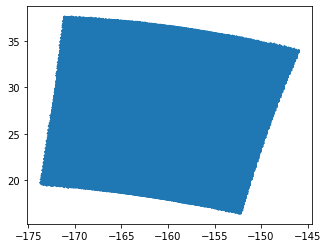

In [3]:
sdf.plot(trixels=True)

# Cover

In [4]:
path = '/home/griessbaum/MOD09/MOD05_L2.A2005349.2125.061.2017294065400.hdf'
granule = starepandas.io.file.Mod05(path)
granule.read_sidecar_cover()
granule.stare_cover

masked_array(data=[1157425104234217476, 1173187702930014212,
                   1182194902184755204, ..., 3467756319912493065,
                   3467758518935748617, 3467760717959004169],
             mask=False,
       fill_value=999999,
            dtype=uint64)

# Archive

In [10]:
path = '/home/griessbaum/MOD09/'
catalogue = starepandas.folder2catalogue(path=path, 
                                         granule_extension='hdf',
                                         add_sf=True)
catalogue.set_trixels(inplace=True)
catalogue

,begining,ending,geom,granule_name,sidecar_name,stare_cover,trixels
0,2019-12-02 00:00:00,2019-12-02 00:05:00,"POLYGON ((-15.93400 53.20178, -15.93275 53.292...",/home/griessbaum/MOD09/MOD05_L2.A2019336.0000....,/home/griessbaum/MOD09/MOD05_L2.A2019336.0000....,"[3614138700964823044, 3616390500778508292, 361...","(POLYGON ((-45 61.3249506244446, -37.692955094..."
1,2019-11-13 08:15:00,2019-11-13 08:20:00,"POLYGON ((24.93397 13.98134, 24.93208 13.96333...",/home/griessbaum/MOD09/MOD09.A2019317.0815.006...,/home/griessbaum/MOD09/MOD09.A2019317.0815.006...,"[4361736239108325380, 4366239838735695876, 437...",(POLYGON ((30.20648377143651 2.508455097115992...
2,2020-09-10 13:20:00,2020-09-10 13:25:00,"POLYGON ((-49.78107 29.28507, -49.78662 29.195...",/home/griessbaum/MOD09/MOD05_L2.A2020254.1320....,/home/griessbaum/MOD09/MOD05_L2.A2020254.1320....,"[2544533789464330244, 2546785589278015492, 256...",(POLYGON ((-36.58975467874757 18.8335842249605...
3,2005-12-15 21:25:00,2005-12-15 21:30:00,"POLYGON ((-171.02278 37.52311, -171.02644 37.4...",/home/griessbaum/MOD09/MOD05_L2.A2005349.2125....,/home/griessbaum/MOD09/MOD05_L2.A2005349.2125....,"[1157425104234217476, 1173187702930014212, 118...",(POLYGON ((-160.2895002531361 23.1317940109882...


In [11]:
path = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(path)
n_america = world[world.continent=='North America']

<AxesSubplot:>

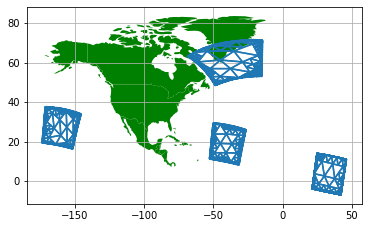

In [18]:
fig, ax = plt.subplots()
ax.grid(True)

catalogue.plot(trixels=True, ax=ax)
n_america.plot(ax=ax, color='green')

# Mod09

In [5]:
file_path = '/home/griessbaum/MOD09/MOD09.A2019317.0815.006.2019319020759.hdf'
granule = staremaster.products.MOD09(file_path)

In [6]:
core_metadata = granule.get_metadata_group('CoreMetadata')    
g_points = core_metadata['INVENTORYMETADATA']['SPATIALDOMAINCONTAINER']['HORIZONTALSPATIALDOMAINCONTAINER']['GPOLYGON']['GPOLYGONCONTAINER']['GRINGPOINT']        
lats = g_points['GRINGPOINTLATITUDE']['VALUE']
lons = g_points['GRINGPOINTLONGITUDE']['VALUE']

lats = list(map(float,lats.strip('()').split(', ')))[::-1]
lons = list(map(float, lons.strip('()').split(', ')))[::-1]
lons

[21.2924408084265, 42.1486370419965, 46.0745301084718, 24.8210112028667]

In [7]:
sids = pystare.to_nonconvex_hull_range_from_latlon(lats, lons, 8)

In [8]:
sdf = starepandas.STAREDataFrame(stare=sids)
sdf.set_trixels(inplace=True)

<AxesSubplot:>

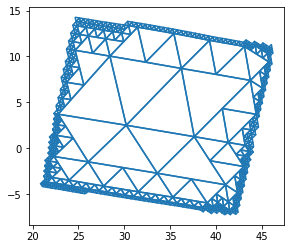

In [9]:
sdf.plot(trixels=True)

# VNP03

In [13]:
file_path = '/home/griessbaum/MOD09/VNP03DNB.A2012092.1642.001.2017285224354.nc'
granule = staremaster.products.VNP03DNB(file_path)

In [15]:
chunk_size = 500
workers = 4
lat_x = xarray.DataArray(granule.lats, dims=['x', 'y']).chunk({'x': chunk_size})
lon_x = xarray.DataArray(granule.lons, dims=['x', 'y']).chunk({'x': chunk_size})
with dask.distributed.Client(n_workers=workers) as client:            
            sids = xarray.apply_ufunc(pystare.from_latlon2D,
                                      lat_x,
                                      lon_x,
                                      dask='parallelized',
                                      kwargs={'adapt_resolution': True},
                                      output_dtypes=[numpy.int64])
            sids = numpy.array(sids)

In [26]:
cover_res = int(pystare.spatial_resolution(sids).max())
cover_res

15

In [27]:
lats_cover = granule.gring_lats[::-1]
lons_cover = granule.gring_lons[::-1]
sids_cover = pystare.to_nonconvex_hull_range_from_latlon(lats, lons, cover_res)
sids_cover

array([2576058986855923715, 2497245993376940036, 2499497793190625284, ...,
       3144003468625182735, 3144003469162053647, 3144003469698924559])

In [28]:
sids_cover.size

136080